# EDA of Selected Birtrh Indicators Data Set

This data was retrieved on November 21, 2022 from the CDC: https://data.cdc.gov/NCHS/NCHS-VSRR-Quarterly-provisional-estimates-for-sele/76vv-a7x8/data

In [156]:
# Import libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt

In [157]:
# Load data
sbi_data = pd.read_csv('NCHS_-_VSRR_Quarterly_provisional_estimates_for_selected_birth_indicators.csv')

# Take a peek!
print(sbi_data.head())

  Year and Quarter        Topic            Topic Subgroup    Indicator  \
0          2022 Q2  Birth Rates  Age-specific Birth Rates  10-14 years   
1          2022 Q2  Birth Rates  Age-specific Birth Rates  10-14 years   
2          2022 Q2  Birth Rates  Age-specific Birth Rates  10-14 years   
3          2022 Q2  Birth Rates  Age-specific Birth Rates  10-14 years   
4          2022 Q2  Birth Rates  Age-specific Birth Rates  15-19 years   

  Race Ethnicity Category  Rate                  Unit Significant  
0   All races and origins   0.2  per 1,000 population         NaN  
1                Hispanic   0.3  per 1,000 population         NaN  
2      Non-Hispanic Black   0.3  per 1,000 population           *  
3      Non-Hispanic White   0.1  per 1,000 population         NaN  
4   All races and origins  13.7  per 1,000 population           *  


In [158]:
# Let's get a more detailed view of the data
print(sbi_data.info()) # View column names, dtypes, and notice missing data
print(sbi_data.describe()) # Some basic stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year and Quarter         1000 non-null   object 
 1   Topic                    1000 non-null   object 
 2   Topic Subgroup           1000 non-null   object 
 3   Indicator                1000 non-null   object 
 4   Race Ethnicity Category  1000 non-null   object 
 5   Rate                     1000 non-null   float64
 6   Unit                     1000 non-null   object 
 7   Significant              84 non-null     object 
dtypes: float64(1), object(7)
memory usage: 62.6+ KB
None
              Rate
count  1000.000000
mean     28.419060
std      28.223903
min       0.100000
25%       7.440000
50%      14.600000
75%      49.125000
max     111.800000


There are 8 columns and 1,000 rows of data. The final column, 'Significant', has several missing values. I will look into this column to see if I can convert it to a Boolean column or not. The'Rate' column is the only one that contains numerical data, but 'Year and Quarter' can likely be converted into format to measure time. The rest appear nominal and categorical, which means there is a lot of grouping in the future. 

In [159]:
# There is a lot of repetition of nominal values, so let's take a look at the unique values of the columns.
for col in sbi_data.columns:
    print(col)
    print(sbi_data[col].unique())

Year and Quarter
['2022 Q2' '2022 Q1' '2021 Q4' '2021 Q3' '2021 Q2' '2021 Q1' '2020 Q4'
 '2020 Q3' '2020 Q2' '2020 Q1']
Topic
['Birth Rates' 'Birthweight' 'Gestational Age' 'Method of Delivery'
 'NICU Admission' 'Source of Payment for the Delivery']
Topic Subgroup
['Age-specific Birth Rates' 'General Fertility Rates' 'Teen Birth Rates'
 'Low Birthweight Rates' 'Preterm Birth Rates' 'Term Birth Rates'
 'Cesarean Delivery Rates' 'Vaginal Birth After Cesarean Delivery Rates'
 'NICU Admission Rates' 'Medicaid']
Indicator
['10-14 years' '15-19 years' '20-24 years' '25-29 years' '30-34 years'
 '35-39 years' '40-44 years' '45+ years' '15-44 years' '15-17 years'
 '18-19 years' 'Low birthweight (Less than 2,500g)'
 'Early preterm (<34 weeks)' 'Late preterm (34-36 weeks)'
 'Total preterm (<37 weeks)' 'Early term (37-38 weeks)'
 'Full term (39-40 weeks)' 'Late term (41 weeks)' 'Cesarean'
 'Low-risk Cesarean' 'Vaginal Birth After Cesarean Delivery'
 'NICU Admission' 'Medicaid']
Race Ethnicity Cate

In [160]:
# Let's take a further look into how topic and topic subgroup are related

for topic in sbi_data['Topic'].unique():
    print(topic)
    # Print the subgroups associated with each topic
    print(sbi_data['Topic Subgroup'][sbi_data['Topic'] == topic].unique()) 

Birth Rates
['Age-specific Birth Rates' 'General Fertility Rates' 'Teen Birth Rates']
Birthweight
['Low Birthweight Rates']
Gestational Age
['Preterm Birth Rates' 'Term Birth Rates']
Method of Delivery
['Cesarean Delivery Rates' 'Vaginal Birth After Cesarean Delivery Rates']
NICU Admission
['NICU Admission Rates']
Source of Payment for the Delivery
['Medicaid']


In [161]:
# I want the quarters to be recognized as time, so I'm adding a new column with datetimes to match with each quarter.

def convert_to_date(year_and_quarter):
    # Grab just the year and turn it into an integer
    year = int(str(year_and_quarter).split()[0])
    # Grab just the quarter and turn it into an integer
    quarter = int(str(year_and_quarter).split()[1][-1])
    # Calculate the month that corresponds to the start of the quarter
    month = quarter * 3 - 2
    # Turn it into a datetime
    return dt(year, month, 1)

# Apply the convert_to_date function to the dataframe to get a new column
sbi_data['Date of Quarter Start'] = sbi_data['Year and Quarter'].apply(lambda x: convert_to_date(x))

#Check it!
#Make sure they match up
print(sbi_data[['Year and Quarter', 'Date of Quarter Start']].head())
print(sbi_data[['Year and Quarter', 'Date of Quarter Start']].tail())
# Make sure there are no surprises
print(sbi_data['Date of Quarter Start'].unique())


  Year and Quarter Date of Quarter Start
0          2022 Q2            2022-04-01
1          2022 Q2            2022-04-01
2          2022 Q2            2022-04-01
3          2022 Q2            2022-04-01
4          2022 Q2            2022-04-01
    Year and Quarter Date of Quarter Start
995          2020 Q1            2020-01-01
996          2020 Q1            2020-01-01
997          2020 Q1            2020-01-01
998          2020 Q1            2020-01-01
999          2020 Q1            2020-01-01
['2022-04-01T00:00:00.000000000' '2022-01-01T00:00:00.000000000'
 '2021-10-01T00:00:00.000000000' '2021-07-01T00:00:00.000000000'
 '2021-04-01T00:00:00.000000000' '2021-01-01T00:00:00.000000000'
 '2020-10-01T00:00:00.000000000' '2020-07-01T00:00:00.000000000'
 '2020-04-01T00:00:00.000000000' '2020-01-01T00:00:00.000000000']


## Some Questions to Ask 
Based on the dataset, there are several avenues we can investigate. How does race affect the rate of C-section? How do average teen birth rates change over time? Does the rate of certain term births vary over time? 

### How does the race of the mother relate to her chances of giving birth via cesarean section? 

In [162]:
# Isolate the data pertaining to C-Sections
cesarean_data = sbi_data[sbi_data['Indicator'] == 'Cesarean'] 

# Take a look
print(cesarean_data.head(8))

    Year and Quarter               Topic           Topic Subgroup Indicator  \
80           2022 Q2  Method of Delivery  Cesarean Delivery Rates  Cesarean   
81           2022 Q2  Method of Delivery  Cesarean Delivery Rates  Cesarean   
82           2022 Q2  Method of Delivery  Cesarean Delivery Rates  Cesarean   
83           2022 Q2  Method of Delivery  Cesarean Delivery Rates  Cesarean   
180          2022 Q1  Method of Delivery  Cesarean Delivery Rates  Cesarean   
181          2022 Q1  Method of Delivery  Cesarean Delivery Rates  Cesarean   
182          2022 Q1  Method of Delivery  Cesarean Delivery Rates  Cesarean   
183          2022 Q1  Method of Delivery  Cesarean Delivery Rates  Cesarean   

    Race Ethnicity Category  Rate            Unit Significant  \
80    All races and origins  32.2  per 100 births           *   
81                 Hispanic  31.7  per 100 births           *   
82       Non-Hispanic Black  36.8  per 100 births         NaN   
83       Non-Hispanic White 

In [163]:
# Keeping all of these columns is unneccesary. Let's get rid of anything that has no variability.
for col in cesarean_data:
    print(col)
    # Print the unique values to see if there is any variability.
    # Also gives us a reference for what that value was once the column is deleted
    print(cesarean_data[col].unique())

Year and Quarter
['2022 Q2' '2022 Q1' '2021 Q4' '2021 Q3' '2021 Q2' '2021 Q1' '2020 Q4'
 '2020 Q3' '2020 Q2' '2020 Q1']
Topic
['Method of Delivery']
Topic Subgroup
['Cesarean Delivery Rates']
Indicator
['Cesarean']
Race Ethnicity Category
['All races and origins' 'Hispanic' 'Non-Hispanic Black'
 'Non-Hispanic White']
Rate
[32.2 31.7 36.8 31.1 32.1 31.6 31.  32.  30.9 31.9 31.5 36.7 36.6 30.8
 31.8 31.4 36.3 36.1 31.3 35.9 30.7]
Unit
['per 100 births']
Significant
['*' nan]
Date of Quarter Start
['2022-04-01T00:00:00.000000000' '2022-01-01T00:00:00.000000000'
 '2021-10-01T00:00:00.000000000' '2021-07-01T00:00:00.000000000'
 '2021-04-01T00:00:00.000000000' '2021-01-01T00:00:00.000000000'
 '2020-10-01T00:00:00.000000000' '2020-07-01T00:00:00.000000000'
 '2020-04-01T00:00:00.000000000' '2020-01-01T00:00:00.000000000']


In [164]:
# Looks like we can drop Topic, Topic Subgroup, Indicator, Unit, and Date of Quarter Start
cesarean_data = cesarean_data.drop(columns=['Topic', 'Topic Subgroup', 'Indicator', 'Unit', 'Date of Quarter Start'])

print(cesarean_data.head()) # Much cleaner!

    Year and Quarter Race Ethnicity Category  Rate Significant
80           2022 Q2   All races and origins  32.2           *
81           2022 Q2                Hispanic  31.7           *
82           2022 Q2      Non-Hispanic Black  36.8         NaN
83           2022 Q2      Non-Hispanic White  31.1           *
180          2022 Q1   All races and origins  32.1         NaN


In [165]:
# Before we can plot our data, we need some x and y coordinates to plot! 
# Our x-values need to match the length of our list of years and quarters
x_values = list(range(len(cesarean_data['Year and Quarter'].unique())))
x_labels = list(cesarean_data['Year and Quarter'].unique())

# We can pull our y_values from the Rate column
y_values_all_races_and_origins = cesarean_data['Rate'][cesarean_data['Race Ethnicity Category'] == 'All races and origins'].values.tolist()
y_values_hispanic = cesarean_data['Rate'][cesarean_data['Race Ethnicity Category'] == 'Hispanic'].values.tolist()
y_values_non_hispanic_black = cesarean_data['Rate'][cesarean_data['Race Ethnicity Category'] == 'Non-Hispanic Black'].values.tolist()
y_values_non_hispanic_white = cesarean_data['Rate'][cesarean_data['Race Ethnicity Category'] == 'Non-Hispanic White'].values.tolist()

print(x_values)
print(x_labels)
print(y_values_all_races_and_origins)
print(y_values_hispanic)
print(y_values_non_hispanic_black)
print(y_values_non_hispanic_white)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['2022 Q2', '2022 Q1', '2021 Q4', '2021 Q3', '2021 Q2', '2021 Q1', '2020 Q4', '2020 Q3', '2020 Q2', '2020 Q1']
[32.2, 32.1, 32.1, 32.0, 31.9, 31.9, 31.8, 31.8, 31.7, 31.7]
[31.7, 31.6, 31.6, 31.6, 31.5, 31.5, 31.4, 31.4, 31.3, 31.3]
[36.8, 36.8, 36.8, 36.8, 36.7, 36.6, 36.3, 36.1, 35.9, 35.9]
[31.1, 31.1, 31.0, 30.9, 30.9, 30.8, 30.8, 30.8, 30.7, 30.7]


In [166]:
# This lists look great, with one problem. All the data from the dataframe is in reverse time order!
# Let's fix that.

list.reverse(x_labels)
list.reverse(y_values_all_races_and_origins)
list.reverse(y_values_hispanic)
list.reverse(y_values_non_hispanic_black)
list.reverse(y_values_non_hispanic_white)


print(x_values)
print(x_labels)
print(y_values_all_races_and_origins)
print(y_values_hispanic)
print(y_values_non_hispanic_black)
print(y_values_non_hispanic_white)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['2020 Q1', '2020 Q2', '2020 Q3', '2020 Q4', '2021 Q1', '2021 Q2', '2021 Q3', '2021 Q4', '2022 Q1', '2022 Q2']
[31.7, 31.7, 31.8, 31.8, 31.9, 31.9, 32.0, 32.1, 32.1, 32.2]
[31.3, 31.3, 31.4, 31.4, 31.5, 31.5, 31.6, 31.6, 31.6, 31.7]
[35.9, 35.9, 36.1, 36.3, 36.6, 36.7, 36.8, 36.8, 36.8, 36.8]
[30.7, 30.7, 30.8, 30.8, 30.8, 30.9, 30.9, 31.0, 31.1, 31.1]


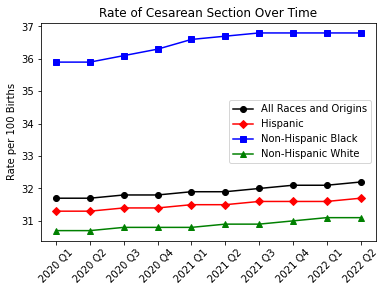

<Figure size 432x288 with 0 Axes>

In [170]:
# Now the data can be plotted

plt.figure()
ax = plt.subplot(1, 1, 1)
plt.plot(y_values_all_races_and_origins, 'ko-', label='All Races and Origins')
plt.plot(y_values_hispanic, 'rD-', label='Hispanic')
plt.plot(y_values_non_hispanic_black, 'bs-', label='Non-Hispanic Black')
plt.plot(y_values_non_hispanic_white, 'g^-', label='Non-Hispanic White')

ax.set_xticks(x_values)
ax.set_xticklabels(x_labels, rotation=45)

plt.legend()
plt.title('Rate of Cesarean Section Over Time')
plt.ylabel('Rate per 100 Births')

plt.show()
plt.clf()


Over the past two years, there has been the slightest uptick in Cesarean Sections. This is unsurprising given that the rate of Cesarean Sections in the US has been climbing steadily for decades. According to the CDC, in 1970 the rate of Cesarean section was just 5%. This high rate of Cesarean Section is alarming, even moreso in that women of color appear to be disproportionately affected. 

### How did teen birth rates change over time from 2020 to 2022?

In [199]:
# Isolate the data pertaining to teen birth rates
teen_birth_rate_data = sbi_data[sbi_data['Topic Subgroup'] == 'Teen Birth Rates']

# Let's see!
print(teen_birth_rate_data.head())


   Year and Quarter        Topic    Topic Subgroup    Indicator  \
36          2022 Q2  Birth Rates  Teen Birth Rates  10-14 years   
37          2022 Q2  Birth Rates  Teen Birth Rates  10-14 years   
38          2022 Q2  Birth Rates  Teen Birth Rates  10-14 years   
39          2022 Q2  Birth Rates  Teen Birth Rates  10-14 years   
40          2022 Q2  Birth Rates  Teen Birth Rates  15-17 years   

   Race Ethnicity Category  Rate                  Unit Significant  \
36   All races and origins   0.2  per 1,000 population         NaN   
37                Hispanic   0.3  per 1,000 population         NaN   
38      Non-Hispanic Black   0.3  per 1,000 population           *   
39      Non-Hispanic White   0.1  per 1,000 population         NaN   
40   All races and origins   5.5  per 1,000 population           *   

   Date of Quarter Start  
36            2022-04-01  
37            2022-04-01  
38            2022-04-01  
39            2022-04-01  
40            2022-04-01  


In [200]:
# Keeping all of these columns is unneccesary. Let's get rid of anything that has no variability.
for col in teen_birth_rate_data:
    print(col)
    # Print the unique values to see if there is any variability.
    # Also gives us a reference for what that value was once the column is deleted
    print(teen_birth_rate_data[col].unique())

Year and Quarter
['2022 Q2' '2022 Q1' '2021 Q4' '2021 Q3' '2021 Q2' '2021 Q1' '2020 Q4'
 '2020 Q3' '2020 Q2' '2020 Q1']
Topic
['Birth Rates']
Topic Subgroup
['Teen Birth Rates']
Indicator
['10-14 years' '15-17 years' '18-19 years' '15-19 years']
Race Ethnicity Category
['All races and origins' 'Hispanic' 'Non-Hispanic Black'
 'Non-Hispanic White']
Rate
[ 0.2  0.3  0.1  5.5  9.2  9.   3.1 26.  39.6 38.8 18.1 13.7 21.  20.8
  5.6  9.3  3.2 26.4 39.8 18.4 13.9 21.2 21.4 26.6 40.6 18.7 21.1 21.8
  9.4  0.4  5.7  9.6 26.9 40.1 41.2 18.9 14.1 22.3  9.5  5.8  9.7  9.9
 27.2 40.5 41.7 19.1 14.4 21.7 22.8  5.9  9.8 10.1  3.3 27.4 40.9 41.9
 19.4 14.5 22.  23.   6.3 10.5 10.8  3.5 28.9 43.3 43.9 20.5 15.4 23.5
 24.4 10.4  6.4  3.6 29.6 44.2 44.9 15.8 24.  24.8 10.7  6.5 11.   3.7
 30.2 45.2 45.8 21.5 16.1 24.6 25.4 10.9  6.6 11.3 11.1 30.7 46.1 21.9
 16.4 25.  25.6 11.2]
Unit
['per 1,000 population']
Significant
[nan '*']
Date of Quarter Start
['2022-04-01T00:00:00.000000000' '2022-01-01T00:00:0

In [201]:
# Let's drop what we don't need
teen_birth_rate_data = teen_birth_rate_data.drop(columns=['Topic', 'Topic Subgroup', 'Unit', 'Significant', 'Date of Quarter Start'])

# We're focusing on all races and origins
teen_birth_rate_data = teen_birth_rate_data[teen_birth_rate_data['Race Ethnicity Category'] == 'All races and origins']

print(teen_birth_rate_data.head()) # Much cleaner!

    Year and Quarter    Indicator Race Ethnicity Category  Rate
36           2022 Q2  10-14 years   All races and origins   0.2
40           2022 Q2  15-17 years   All races and origins   5.5
44           2022 Q2  18-19 years   All races and origins  26.0
48           2022 Q2  15-19 years   All races and origins  13.7
136          2022 Q1  10-14 years   All races and origins   0.2


In [206]:
# Before we can plot our data, we need some x and y coordinates to plot! 
# Our x-values need to match the length of our list of years and quarters
x_values = list(range(len(teen_birth_rate_data['Year and Quarter'].unique())))
x_labels = list(teen_birth_rate_data['Year and Quarter'].unique())

# We can pull our y_values from the Rate column
y_values_10_14_years = teen_birth_rate_data['Rate'][teen_birth_rate_data['Indicator'] == '10-14 years'].values.tolist()
y_values_15_17_years = teen_birth_rate_data['Rate'][teen_birth_rate_data['Indicator'] == '15-17 years'].values.tolist()
y_values_18_19_years = teen_birth_rate_data['Rate'][teen_birth_rate_data['Indicator'] == '18-19 years'].values.tolist()

# Reverse to move forward in time
list.reverse(x_labels)
list.reverse(y_values_10_14_years)
list.reverse(y_values_15_17_years)
list.reverse(y_values_18_19_years)


print(x_values)
print(x_labels)
print(y_values_10_14_years)
print(y_values_15_17_years)
print(y_values_18_19_years)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['2020 Q1', '2020 Q2', '2020 Q3', '2020 Q4', '2021 Q1', '2021 Q2', '2021 Q3', '2021 Q4', '2022 Q1', '2022 Q2']
[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
[6.6, 6.5, 6.4, 6.3, 5.9, 5.8, 5.7, 5.6, 5.6, 5.5]
[30.7, 30.2, 29.6, 28.9, 27.4, 27.2, 26.9, 26.6, 26.4, 26.0]


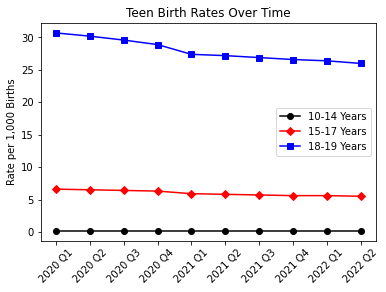

<Figure size 432x288 with 0 Axes>

In [207]:
#Plot the data

plt.figure()
ax = plt.subplot(1, 1, 1)
plt.plot(y_values_10_14_years, 'ko-', label='10-14 Years')
plt.plot(y_values_15_17_years, 'rD-', label='15-17 Years')
plt.plot(y_values_18_19_years, 'bs-', label='18-19 Years')

ax.set_xticks(x_values)
ax.set_xticklabels(x_labels, rotation=45)

plt.legend()
plt.title('Teen Birth Rates Over Time')
plt.ylabel('Rate per 1,000 Births')

plt.show()
plt.clf()

### How does rate of births at various pregnancy terms change over time from 2020 to 2022? 